In [20]:
import os
from PIL import Image
import numpy as np

openslide_path = r'C:\Users\Donald\Documents\openslide-win64-20230414\bin'

os.environ['PATH'] = openslide_path + ";" + os.environ['PATH']
# from openslide import OpenSlide


if hasattr(os, 'add_dll_directory'):
    # Python >= 3.8 on Windows
    with os.add_dll_directory(openslide_path):
        import openslide
else:
    import openslide
from openslide import OpenSlide

import os

In [21]:
pth_ndpi = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40'
pth_mat = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_detection\coordinates_and_images_from_tiles.mat'

In [22]:
from scipy.io import loadmat

outpth = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_detection\20x_segmentation_tiles'

file_format = '.tif'

try:
    data = loadmat(pth_mat)
    print('ahhhhhhhhhhhh')

    #crop_x = int(data['crop_x']*ratio)
    #crop_y = int(data['crop_y']*ratio)
except:
    data = h5py.File(pth_mat, 'r')

    #crop_x = int(data['crop_x'][()]*ratio)
    #crop_y = int(data['crop_y'][()]*ratio)

#data['storedTiles'][0][0]


ahhhhhhhhhhhh


In [23]:
ratio = 1/0.4416

row = 2
name = data['storedTiles'][0][0][row,0][0]
x = int(data['storedTiles'][0][0][row,1][0,0][0,0]*ratio)
y = int(data['storedTiles'][0][0][row,1][0,0][0,1]*ratio)

print(name)
print(x)
print(y)

\\fatherserverdw\andreex\data\monkey fetus\gestational 40\cell_dect_images\10x\monkey_fetus_40_0377.tif
18251
15966


In [24]:
nms = []
for i in data['storedTiles'][0][0][:,0]:
    nms.append(r'\\10.99.68.178' + i[0][16:-4] + '.ndpi')

nms

['\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_dect_images\\10x\\monkey_fetus_40_0460.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_dect_images\\10x\\monkey_fetus_40_0252.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_dect_images\\10x\\monkey_fetus_40_0377.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_dect_images\\10x\\monkey_fetus_40_0608.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_dect_images\\10x\\monkey_fetus_40_0427.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_dect_images\\10x\\monkey_fetus_40_0496.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_dect_images\\10x\\monkey_fetus_40_0470.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_dect_images\\10x\\monkey_fetus_40_0650.ndpi',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_de

In [25]:
outpth = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_detection\20x_segmentation_tiles'

for i, file in enumerate(nms):

    WSI_path = file
    nm = os.path.basename(file)

    f_out_name = f'{os.path.join(outpth, nm[:-5])}{file_format}'

    ndpi = os.path.join(pth_ndpi, nm)

    WSI_slide = openslide.OpenSlide(ndpi)

    wsi_width, wsi_height = WSI_slide.level_dimensions[0]

    crop_width = int(250*ratio)
    crop_height = int(250*ratio)
    crop_x = int(data['storedTiles'][0][0][i,1][0,0][0,0]*ratio)
    crop_y = int(data['storedTiles'][0][0][i,1][0,0][0,1]*ratio)

    lower_x = crop_x
    upper_y = crop_y
    upper_x = crop_x + crop_width
    lower_y = crop_y - crop_height

    # print(crop_x)
    # print(crop_y)
    # print(crop_width)
    # print(crop_height)
    if os.path.exists(f_out_name):
        print(f'Skipping cropping for {file} ({i+1}/{len(nms)})... Already exists')
    else:
        print(f'Cropping {file} ({i+1}/{len(nms)})')

        region = WSI_slide.read_region((crop_x, crop_y), 0, (crop_width, crop_height)) # level = 0 in middle
        region_image = Image.new('RGB', region.size)
        region_image.paste(region, (0, 0))

        region_image.save(f_out_name)
        WSI_slide.close()


Skipping cropping for \\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_dect_images\10x\monkey_fetus_40_0460.ndpi (1/16)... Already exists
Skipping cropping for \\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_dect_images\10x\monkey_fetus_40_0252.ndpi (2/16)... Already exists
Skipping cropping for \\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_dect_images\10x\monkey_fetus_40_0377.ndpi (3/16)... Already exists
Skipping cropping for \\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_dect_images\10x\monkey_fetus_40_0608.ndpi (4/16)... Already exists
Skipping cropping for \\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_dect_images\10x\monkey_fetus_40_0427.ndpi (5/16)... Already exists
Skipping cropping for \\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_dect_images\10x\monkey_fetus_40_0496.ndpi (6/16)... Already exists
Skipping cropping for \\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_dect_images\10x\m

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os

from tifffile import imread, imsave
from csbdeep.utils import Path, normalize
from csbdeep.utils.tf import keras_import
keras = keras_import()

from stardist import export_imagej_rois, random_label_cmap
from stardist.models import StarDist2D

np.random.seed(0)
cmap = random_label_cmap()

In [27]:
def show_image(img, crop_x, crop_y, tile_size, **kwargs):
    """Plot large image at different resolutions."""
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    # Plot the original image on the left
    ax[0].imshow(img, **kwargs)

    # Crop the image
    cropped_img = img[crop_y:crop_y+tile_size, crop_x:crop_x+tile_size]

    # Plot the cropped image on the right
    ax[1].imshow(cropped_img, **kwargs)

    ax[0].axis('off')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

In [28]:
def load_model(model_path: str) -> StarDist2D:
    # Load StarDist model weights, configurations, and thresholds
    with open(model_path + '\\config.json', 'r') as f:
        config = json.load(f)
    with open(model_path + '\\thresholds.json', 'r') as f:
        thresh = json.load(f)
    model = StarDist2D(config=Config2D(**config), basedir=model_path, name='offshoot_model')
    model.thresholds = thresh
    print('Overriding defaults:', model.thresholds, '\n')
    model.load_weights(model_path + '\\weights_best.h5')
    return model

In [29]:
import json
from stardist.models import Config2D

model = load_model(r"\\10.99.68.178\andreex\data\Stardist\qupath_training_annotations\models\monkey_ft_11_03_2023_lr_0.001_epochs_400_pt_40")

Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.7141860056664086, nms=0.3) 



In [30]:
def show_tile(tile, **kwargs):
    """Plot a single image."""
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    ax.imshow(tile, **kwargs)
    plt.tight_layout()
    ax.set_axis_off()
    plt.show()

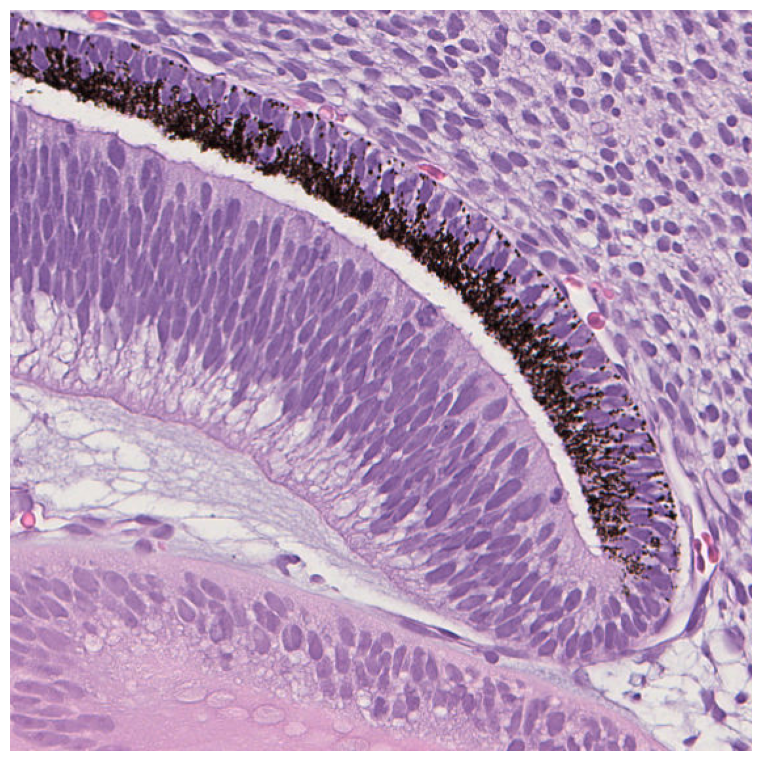

In [31]:
tiles_path = outpth
tiles = [_ for _ in os.listdir(tiles_path) if _.endswith('tif')]

ind = 0

tile = os.path.join(tiles_path, tiles[ind])
tile_im = imread(tile)

show_tile(tile_im)

In [32]:
full_tiles_path = []
for x in tiles:
    full_tiles_path.append(os.path.join(tiles_path, x))

full_tiles_path

['\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0252.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0377.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0380.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0425.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0427.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0450.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0460.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detect

In [33]:
from csbdeep.utils import Path, normalize
from stardist import fill_label_holes
from tqdm import tqdm  # progress bar class
from glob import glob

X = full_tiles_path
X = list(map(imread,X))

n_channel = 1 if X[0].ndim == 2 else X[0].shape[-1]

X = [x/255 for x in X]  # no norm, just divide by 255 to get into (0,1) range

Y_pred = [model.predict_instances(x, n_tiles=model._guess_n_tiles(x), show_tile_progress=False)[0]
              for x in tqdm(X)]

100%|██████████| 16/16 [00:03<00:00,  4.87it/s]


In [34]:
def show_tile_segmented(tile, segmented, **kwargs):
    """Plot large image at different resolutions."""
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    # Plot the original image on the left
    ax[0].imshow(tile, **kwargs)

    # Plot the cropped image on the right
    ax[1].imshow(segmented, **kwargs)

    ax[0].axis('off')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

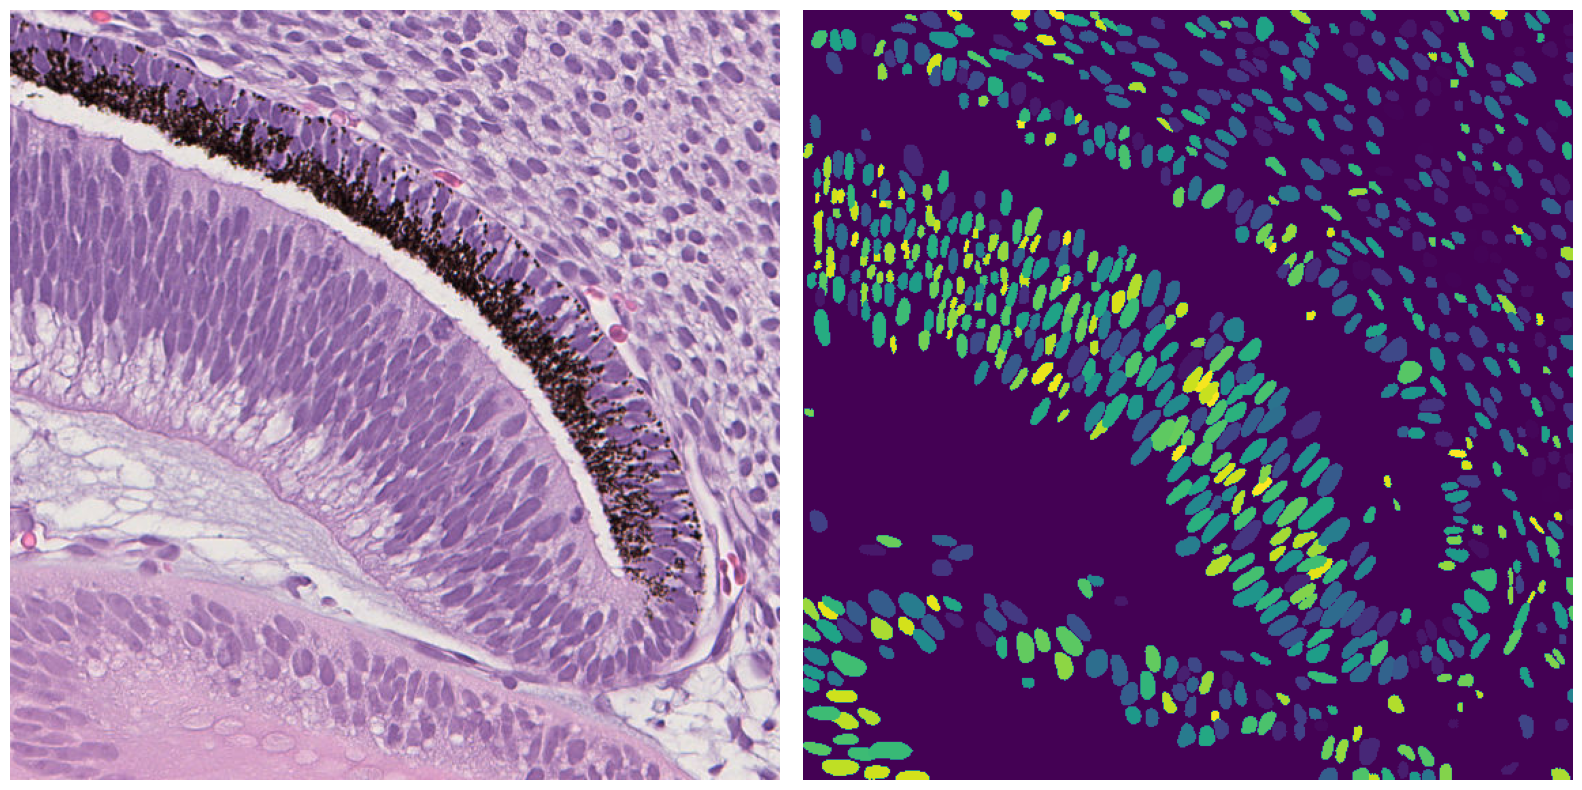

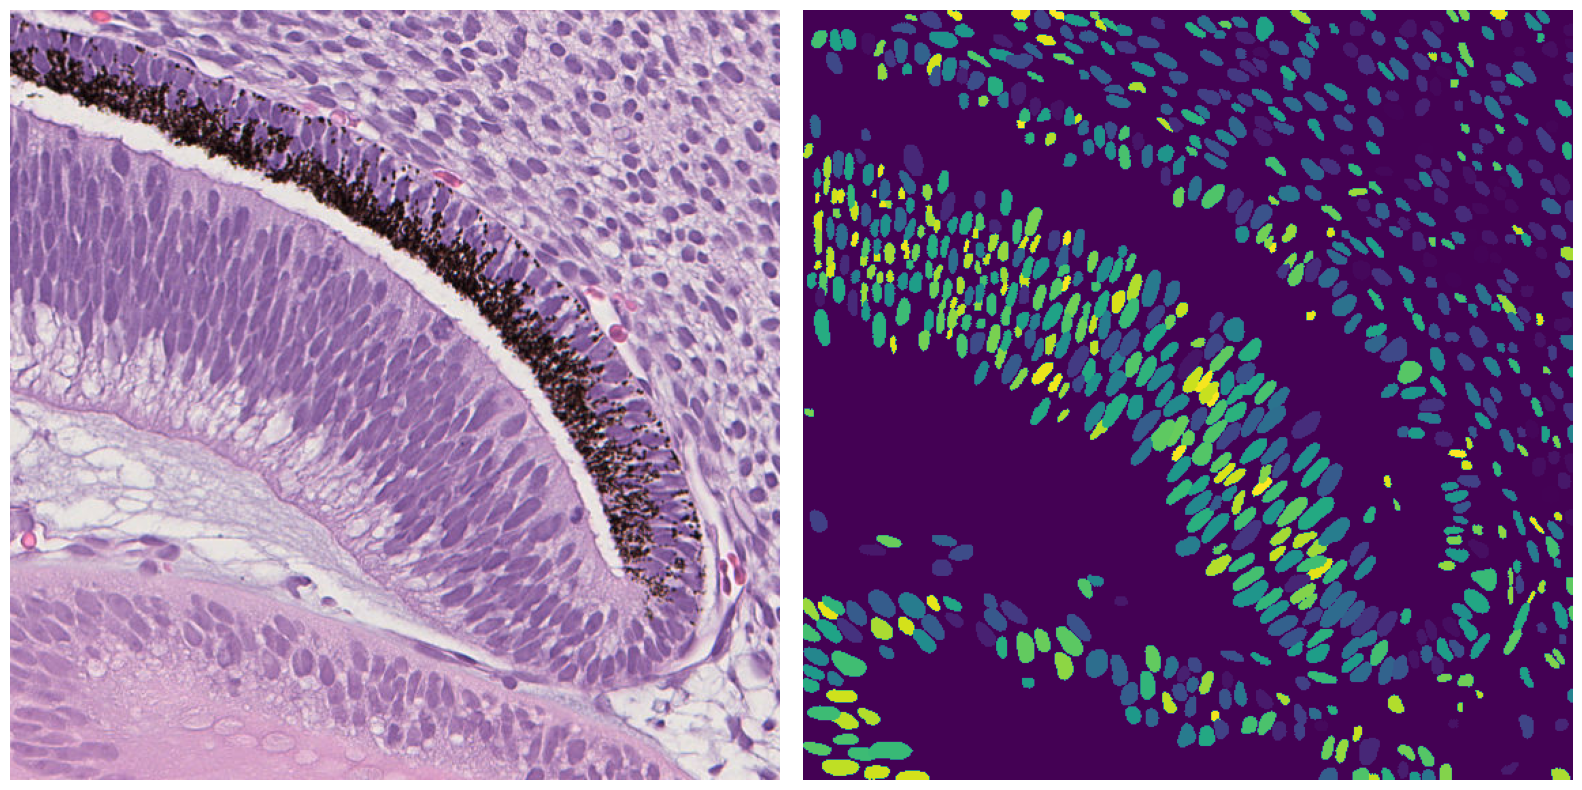

In [35]:
ind = 0

img = X[ind]
lbl = Y_pred[ind]

show_tile_segmented(img, lbl)

In [36]:
def get_col(ind):
    # for 4x4 matrix:
    return ind % 4

def get_row(ind):
    # for 4x4 matrix:
    return ind // 4

In [37]:
# I got order of the tiles in mosaic by just looking at it, I should have made the mosaic in ordered fashion sorted by slide num

ordered_segmented_tifs = [
    'monkey_fetus_40_0460.tif', 'monkey_fetus_40_0427.tif', 'monkey_fetus_40_0610.tif', 'monkey_fetus_40_0505.tif',
    'monkey_fetus_40_0252.tif', 'monkey_fetus_40_0496.tif', 'monkey_fetus_40_0652.tif', 'monkey_fetus_40_0525.tif',
    'monkey_fetus_40_0377.tif', 'monkey_fetus_40_0470.tif', 'monkey_fetus_40_0425.tif', 'monkey_fetus_40_0380.tif',
    'monkey_fetus_40_0608.tif', 'monkey_fetus_40_0650.tif', 'monkey_fetus_40_0653.tif', 'monkey_fetus_40_0450.tif']

tiles_path = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_detection\20x_segmentation_tiles'

ordered_segmented_tifs = [os.path.join(tiles_path,f) for f in ordered_segmented_tifs]

ordered_segmented_tifs

['\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0460.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0427.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0610.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0505.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0252.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0496.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0652.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detect

['\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0460.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0427.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0610.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0505.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0252.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0496.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detection\\20x_segmentation_tiles\\monkey_fetus_40_0652.tif',
 '\\\\10.99.68.178\\andreex\\data\\monkey fetus\\gestational 40\\cell_detect

In [66]:
from scipy.io import savemat

outpth = fr'{tiles_path}\stardist_segmented_centroids'
if not os.path.exists(outpth):
    os.mkdir(outpth)

out_pth = Path(outpth)

tiles = ordered_segmented_tifs

MATdata = []

for cc in range(len(tiles)):
    name = tiles[cc]
    print(name)
    tile_pth = os.path.join(tiles_path, name)
    tile = imread(tile_pth)

    tile = tile/255

    result = model.predict_instances(tile)

    # save centroids
    coords = result[1]['coord']

    data_stardist = []
    for i in range(len(result[1]['points'])):
        nucleus = result[1]['points'][i]
        data_stardist.append(nucleus)

    row = get_col(cc)
    col = get_row(cc)  # oops lol

    tile_size = crop_width

    downsize = 0.4416/1

    for centroid in data_stardist:
        centroid = centroid[::-1]
        # centroid = [centroid[0]+tile_size*row, centroid[1]+tile_size*col]
        centroid = [(centroid[0]+1)*downsize+row*tile_size*downsize, (centroid[1]+1)*downsize+col*tile_size*downsize]
        MATdata.append(centroid)

mat_file_pth = os.path.join(outpth, 'stardist_centroids.mat')

print(mat_file_pth)

savemat(mat_file_pth, {'centroids': MATdata})
print(f"{new_fn} saved as a .mat file.")

\\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_detection\20x_segmentation_tiles\monkey_fetus_40_0460.tif
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_detection\20x_segmentation_tiles\monkey_fetus_40_0427.tif
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_detection\20x_segmentation_tiles\monkey_fetus_40_0610.tif
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_detection\20x_segmentation_tiles\monkey_fetus_40_0505.tif
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_detection\20x_segmentation_tiles\monkey_fetus_40_0252.tif
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_detection\20x_segmentation_tiles\monkey_fetus_40_0496.tif
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_detection\20x_segmentation_tiles\monkey_fetus_40_0652.tif
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_detection\20x_segmentation_tiles\monkey_fetus_40_0525.tif
\\10.99.68.178\andreex\data\monkey fetus\gestati

\\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_detection\20x_segmentation_tiles\monkey_fetus_40_0252.tif


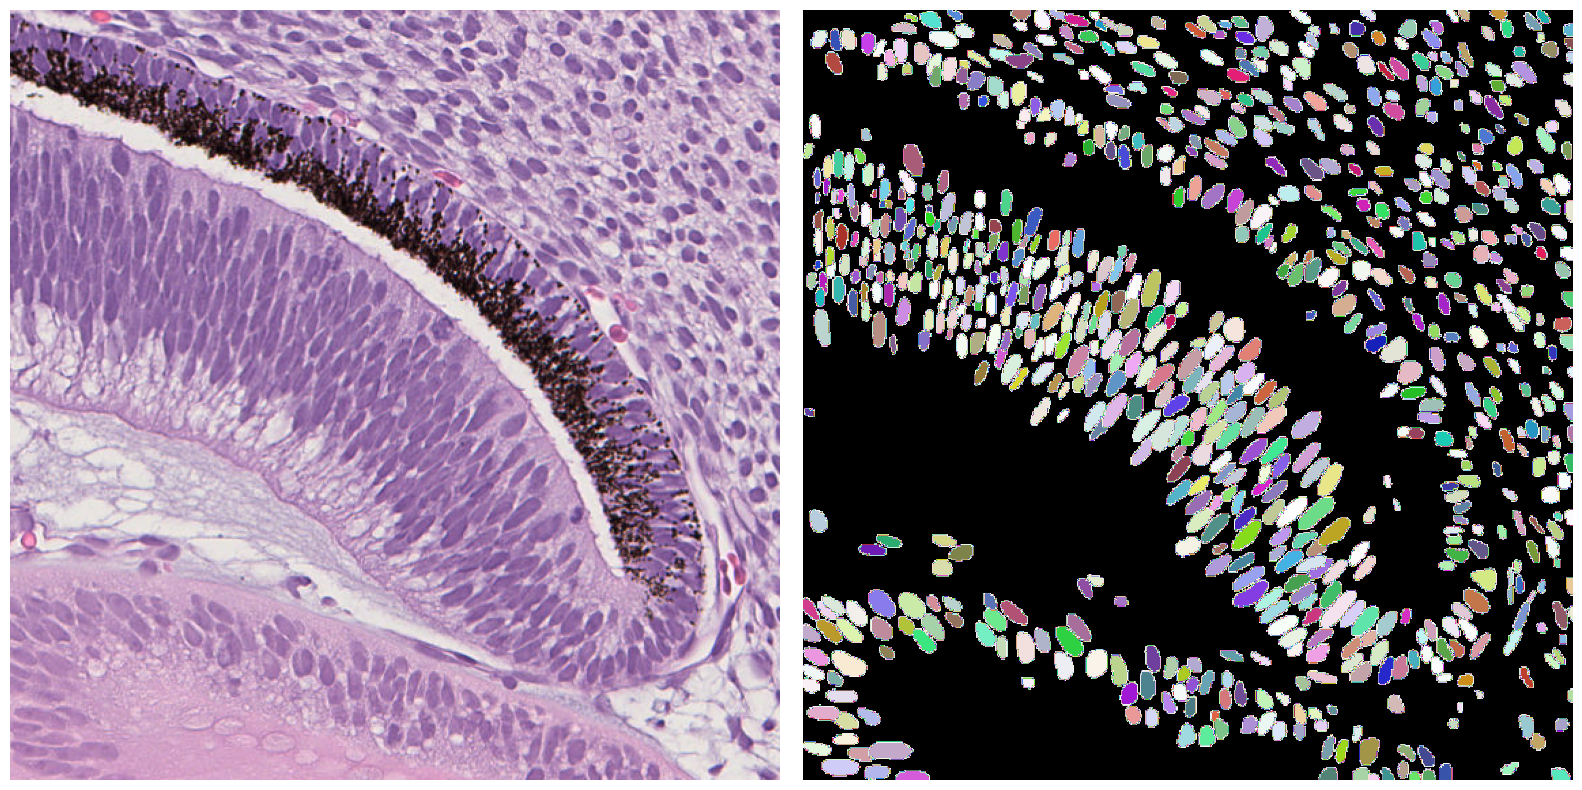

In [69]:
name = tiles[4]
print(name)
tile_pth = os.path.join(tiles_path, name)
tile = imread(tile_pth)
tile = tile/255

labels, polys = model.predict_instances(tile)
show_tile_segmented(tile, labels, cmap = cmap)


\\10.99.68.178\andreex\data\monkey fetus\gestational 40\cell_detection\20x_segmentation_tiles\monkey_fetus_40_0252.tif


Text(0.5, 1.0, 'Predicted')

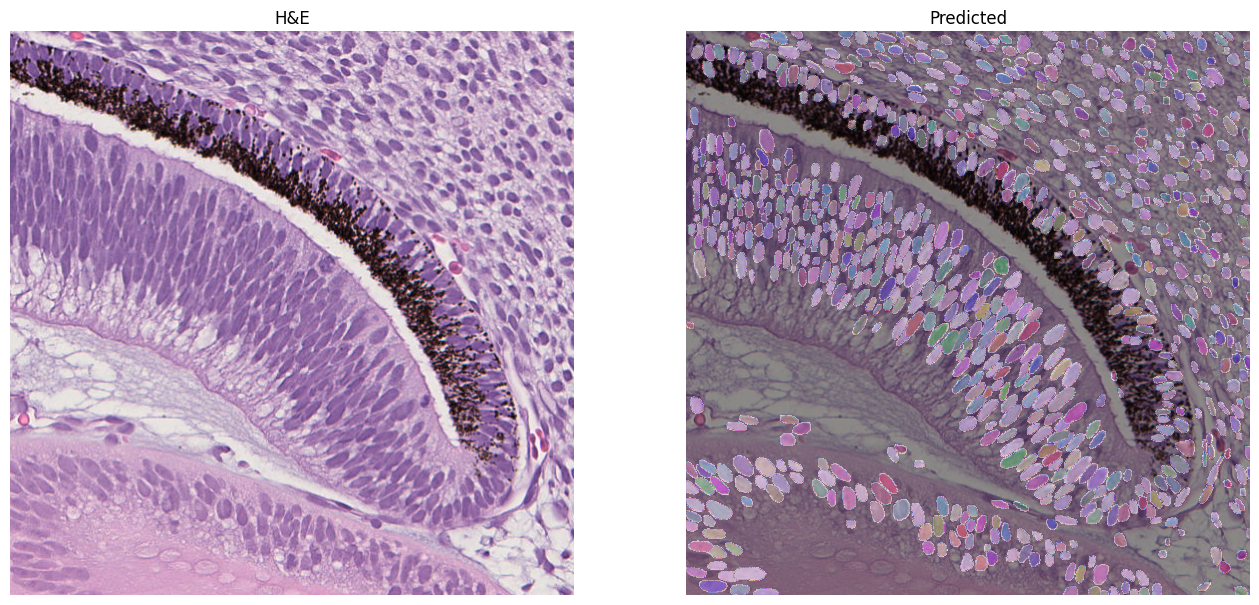

In [72]:
def show_tile_segmented(tile, segmented, **kwargs):
    """Plot large image at different resolutions."""
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))

    # Plot the original image on the left
    ax[0].imshow(tile, **kwargs)

    # Plot the cropped image on the right
    ax[1].imshow(segmented, **kwargs)

    ax[0].axis('off')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

ind = 0

name = tiles[4]
print(name)
tile_pth = os.path.join(tiles_path, name)
tile = imread(tile_pth)
tile = tile/255

np.random.seed(42)
lbl_cmap = random_label_cmap()

lbl, polys = model.predict_instances(tile)

fig, ax = plt.subplots(1,2,figsize = (16, 8))
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('H&E')

ax[1].imshow(img)
ax[1].imshow(lbl, cmap=lbl_cmap, alpha=0.4)
ax[1].axis('off')
ax[1].set_title('Predicted')